In [1]:
import sys
import os

# Añade el directorio padre al sys.path
sys.path.append(os.path.abspath("/eos/home-d/dcostasr/SWAN_projects/2025_data"))
sys.path.append(os.path.abspath("/eos/home-d/dcostasr/SWAN_projects/NiCf/offline_trigger"))
sys.path.append('/eos/home-d/dcostasr/SWAN_projects/software/hipy')
sys.path.append("/eos/home-d/dcostasr/SWAN_projects/software/wcte_software/")

import hipy.pltext       as pltext
import hipy.utils        as ut
import matplotlib.pyplot as plt
import awkward           as ak
import numpy             as np
import matplotlib.colors as colors

from src.read_data                   import load_concatenated, read_parquet, nHits
from tqdm.notebook                   import tqdm
from WCTE_event_display.EventDisplay import EventDisplay
from scipy.special import factorial


%load_ext autoreload
%autoreload 2

pltext.style()

In [ ]:
# ============= LOADS THE DATA ===================
run  = 1726 
data = load_concatenated(outdir=f"/eos/home-d/dcostasr/SWAN_projects/NiCf/offline_trigger/tmp_parquet/{run}")

In [3]:
# =============== MASK OUT CARDS 130-132 ===================
run_cards, run_channels, run_slots, run_positions, run_times, run_events, run_charges, run_window_times = read_parquet(data, mask=True)

In [4]:
hit_times = ak.sort(run_times)

In [5]:
len(hit_times)

174924

In [6]:
hit_times = hit_times[~(run_window_times % 2**26 < 1e7)]

# Test nHits and Plot Triggered Hits

In [ ]:
triggered_hits_index = nHits(hit_times, w=50, thresh_min=5, thresh_max=50, pre_window=50, post_window=50, jump=100)

100%|██████████| 174924/174924 [01:03<00:00, 2757.86it/s]


In [ ]:
triggered_hits_index.get(74998)

[array([14, 15, 16, 17, 18, 19]),
 array([27, 28, 29, 30, 31]),
 array([35, 36, 37, 38, 39, 40, 41, 42]),
 array([53, 54, 55, 56, 57, 58, 59, 60, 61]),
 array([67, 68, 69, 70, 71, 72, 73]),
 array([104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141]),
 array([142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165]),
 array([167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
        180, 181, 182, 183, 184, 185, 186]),
 array([215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,
        228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240,
        241, 242, 243, 244, 245, 246, 247, 248]),
 array([249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
        262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 2

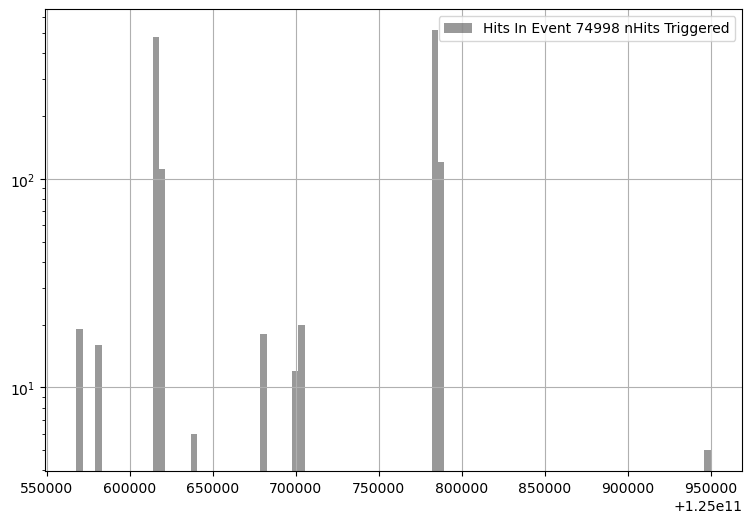

In [ ]:
# Some Plots 
event = 74998
triggered_hits = np.concatenate(triggered_hits_index.get(event))

fig = plt.figure(figsize=(9,6))
pltext.hist(hit_times[event][triggered_hits], 100, ylog=True, 
            stats=False, label=f"Hits In Event {event} nHits Triggered", formate=".2e", 
            histtype="stepfilled", alpha=0.4);
# pltext.hist(hit_times[event], 100, ylog=False, xylabels=("Time [ns]"), stats=True, label=f"Hits In Event {event}", formate=".2e");

In [ ]:
hit_times[event][143] - hit_times[event][142]

2.3134765625

In [ ]:
hit_times[event][triggered_hits_index.get(event)[5]][-1] - hit_times[event][triggered_hits_index.get(event)[6]][0]

-150.0507049560547

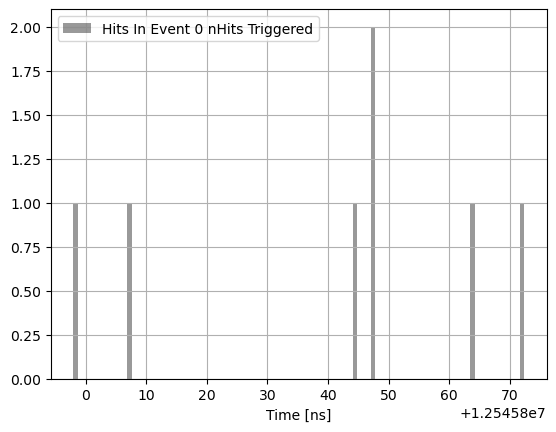

In [ ]:
event = 0
pltext.hist(hit_times[event][triggered_hits_index.get(event)[1]], 100, ylog=False, 
            stats=False, label=f"Hits In Event {event} nHits Triggered", formate=".2e", 
            histtype="stepfilled", alpha=0.4, xylabels="Time [ns]");

# plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

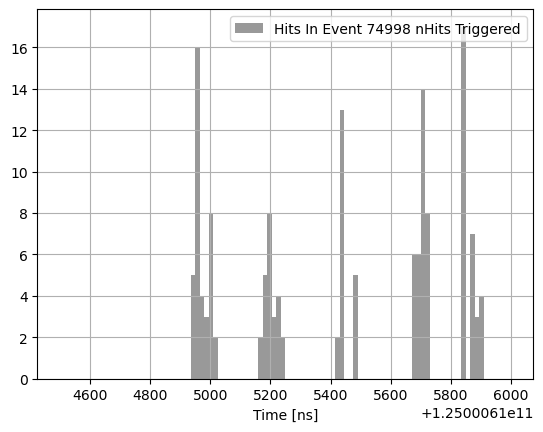

In [ ]:
event = 74998
triggered_hits = np.concatenate(triggered_hits_index.get(event))

# fig = plt.figure(figsize=(9,6))
pltext.hist(hit_times[event][triggered_hits], 100, ylog=False, 
            stats=False, label=f"Hits In Event {event} nHits Triggered", formate=".2e", 
            histtype="stepfilled", alpha=0.4, range=(14500+1.250006e11, 16000+1.250006e11), xylabels="Time [ns]");

# plt.vlines(6.8+2.745266e7, 0, 50);
# plt.vlines(2.740e7+550, 0, 50);

plt.legend(loc="upper right")

In [ ]:
d = list(triggered_hits_index.keys())
indices = np.linspace(0, len(d) - 1, 8).astype(int)
valid_events = [d[i] for i in indices]

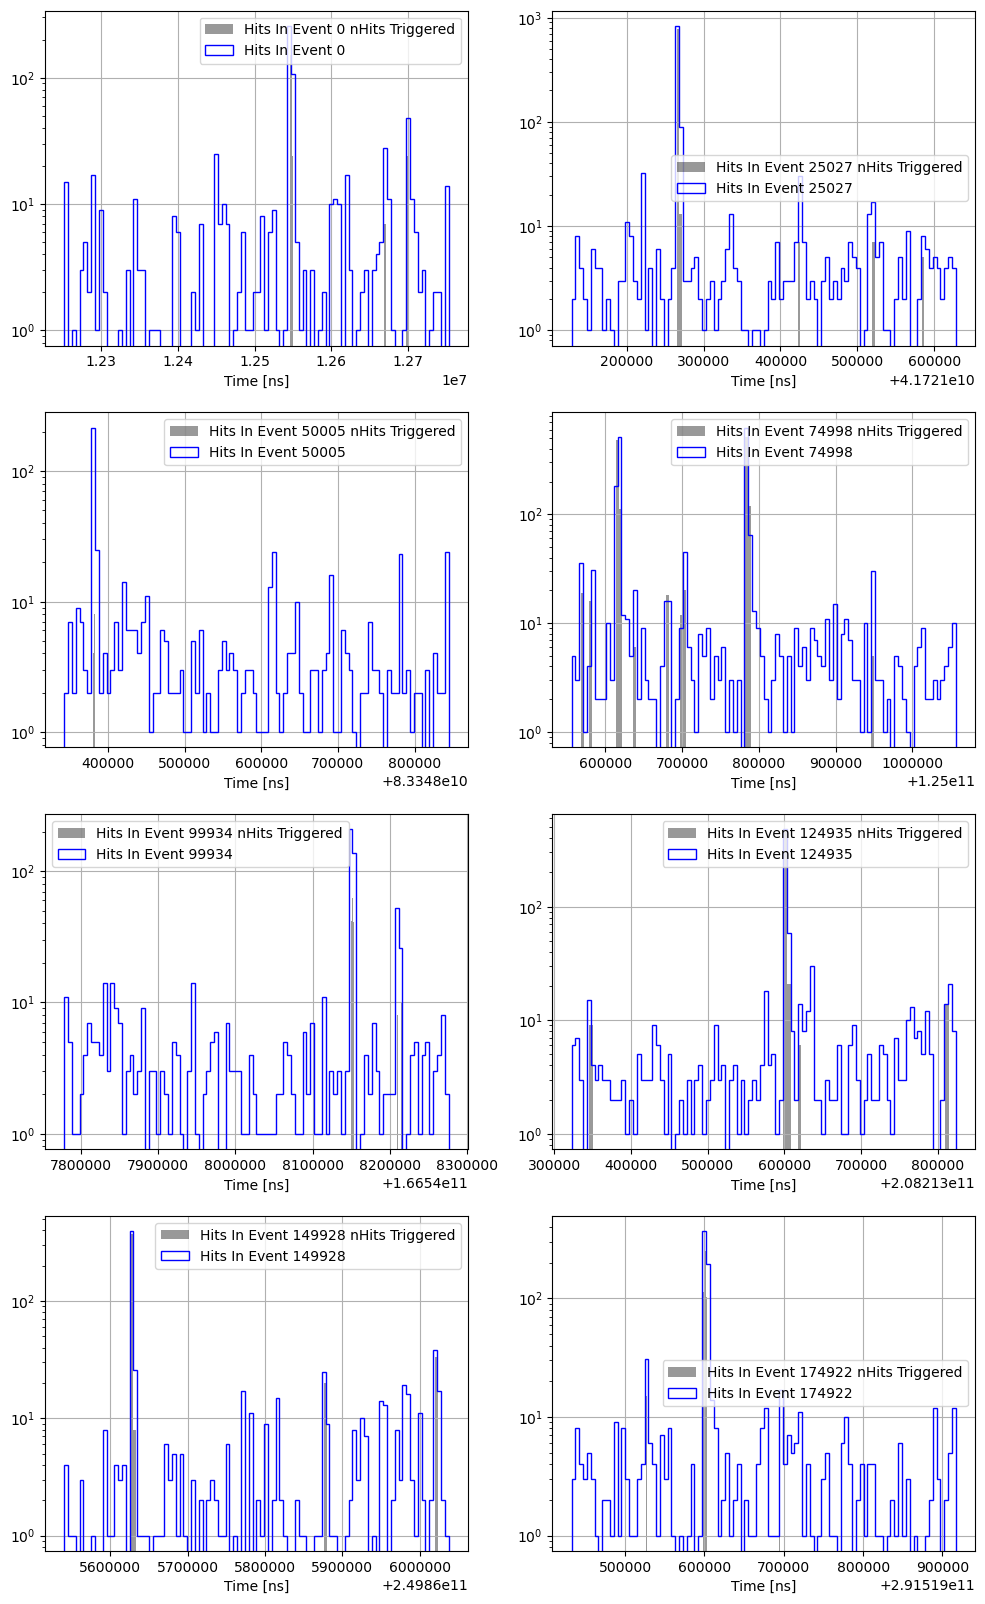

In [ ]:
subplot = pltext.canvas(8)

for i, event in enumerate(valid_events):
    triggered_hits = np.concatenate(triggered_hits_index[event])
    subplot(i+1)
    pltext.hist(hit_times[event][triggered_hits], 100, ylog=True, 
                stats=False, label=f"Hits In Event {event} nHits Triggered", formate=".2e", 
                histtype="stepfilled", alpha=0.4);
    pltext.hist(hit_times[event], 100, ylog=True, xylabels=("Time [ns]"), stats=False, label=f"Hits In Event {event}", formate=".2e");

# Number Of Triggers Per Event In Concordance With Simulation (50 ns window)

In [ ]:
thresholds   = [4,5,6,7,8,9,10,11,12]
exp_values_no_upper_bound = []

for thresh in thresholds:
    triggered_hits_index = nHits(hit_times, w=50, thresh_min=thresh, thresh_max=np.inf, pre_window=50, post_window=50, jump=15000, progress_bar=False)
    noTriggers_per_event = []
    for key in triggered_hits_index.keys():
        noTriggers_per_event.append(len(triggered_hits_index.get(key)))
    
    exp_values_no_upper_bound.append(ut.stats(noTriggers_per_event)[1:3])

In [ ]:
sim_entries = [1674, 1231, 904, 700, 558, 447, 358, 291, 238]
theo_values = [500e-6/(1/(i/5e4*3.7e5)) for i in sim_entries]

In [ ]:
# for w in range(len(windows)):
#     means = [i[0] for i in exp_values_w[w]]
#     stds  = [i[1] for i in exp_values_w[w]]
means = [i[0] for i in exp_values_no_upper_bound]
stds  = [i[1] for i in exp_values_no_upper_bound]
plt.errorbar(thresholds, means, stds, fmt=".", label=f"Data");


plt.scatter(thresholds, theo_values, marker=".", color="red", zorder=2, label="WCSim");
# plt.text(6.6, 5.4, "Trigger Window: 50 ns");

plt.xlabel("Trigger Threshold");
plt.ylabel("No. Triggers");
plt.title("No. Triggers in 500 $\mu$s Readout Window. 50 ns TW");
plt.legend();

NameError: name 'exp_values' is not defined

In [ ]:
triggered_hits_index_50 = nHits(hit_times, w=50, t=5, pre_window=50, post_window=50, jump=15000)
noTriggers_per_event_50 = [len(triggered_hits_index_50.get(key)) for key in triggered_hits_index_50.keys()]

triggered_hits_index_70 = nHits(hit_times, w=70, t=5, pre_window=50, post_window=50, jump=15000)
noTriggers_per_event_70 = [len(triggered_hits_index_70.get(key)) for key in triggered_hits_index_70.keys()]

triggered_hits_index_100 = nHits(hit_times, w=100, t=5, pre_window=50, post_window=50, jump=15000)
noTriggers_per_event_100 = [len(triggered_hits_index_100.get(key)) for key in triggered_hits_index_100.keys()]

100%|██████████| 48195/48195 [00:12<00:00, 3834.00it/s]


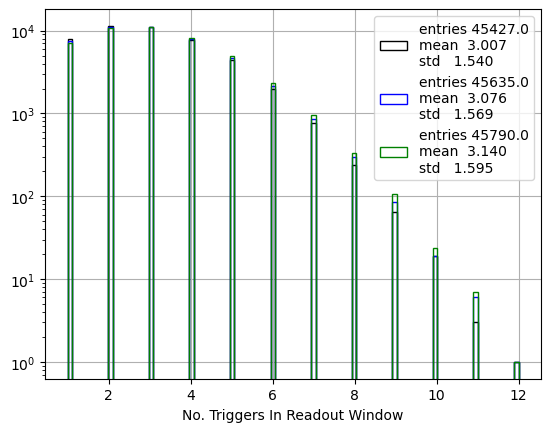

In [ ]:
pltext.hist(noTriggers_per_event_50, 100, ylog=True);
pltext.hist(noTriggers_per_event_70, 100, ylog=True);
pltext.hist(noTriggers_per_event_100, 100, ylog=True);
plt.xlabel("No. Triggers In Readout Window");

# nHits Algorithm Test
As far as I can see, the algorithm works as expected.

In [ ]:
test_hit_times = ak.Array([[1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9, # First Trigger
                            4.8,
                            10.0,
                            20.0,
                            100.0,
                            110.0,110.1,110.2,110.3,110.4,110.5,110.6,110.7,110.8,110.7,110.8,110.9, # Second Trigger (False because jump)
                            200.0,
                            300.0,
                            500.0,
                            600.0,
                            700.0,
                            800.0,
                            820.0,820.1,820.2,820.3,820.4,820.5,820.6,820.7,820.8,820.9, # Third Trigger
                            900.0]])

In [ ]:
triggered_hits_index = nHits(test_hit_times, w=5, thresh_min=5, thresh_max=6, pre_window=0, post_window=0, jump=500, progress_bar=True)
triggered_hits_index

100%|██████████| 1/1 [00:00<00:00, 2182.26it/s]


{0: [array([ 6,  7,  8,  9, 10]), array([37, 38, 39, 40, 41])]}

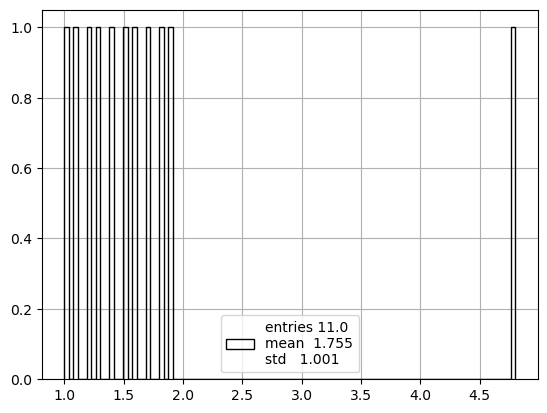

In [ ]:
pltext.hist(test_hit_times[0][triggered_hits_index.get(0)[0]], 100);
# pltext.hist(test_hit_times[0][triggered_hits_index.get(0)[1]], 100);

# Cosmic Muons With nHits Trigger
In Xiaoyue's words, 50 ns should be enough in order to catch the cosmic muons since light from one cornet to the opposite one takes 20 ns, even though, I'll go with 100 ns just in case. Threshold will be 200 hits, enough to get rid of the NiCf.

In [ ]:
cosmic_triggered_hits_index = nHits(hit_times, w=200, thresh_min=150, thresh_max=np.inf, pre_window=300, post_window=5000, jump=500, progress_bar=True)
cosmic_triggered_hits_index.keys()

100%|██████████| 174924/174924 [00:19<00:00, 9104.17it/s] 


dict_keys([9, 24, 40, 47, 63, 92, 99, 101, 102, 125, 129, 146, 148, 162, 169, 173, 174, 180, 181, 183, 189, 191, 192, 203, 205, 213, 220, 221, 222, 232, 233, 243, 262, 267, 292, 321, 323, 325, 337, 339, 341, 344, 354, 355, 373, 376, 378, 390, 402, 413, 420, 445, 448, 454, 456, 475, 482, 483, 484, 491, 495, 503, 556, 570, 584, 585, 595, 614, 616, 624, 634, 656, 661, 666, 669, 670, 674, 686, 690, 691, 695, 701, 713, 733, 739, 740, 764, 772, 780, 781, 786, 812, 816, 828, 829, 835, 836, 848, 852, 863, 865, 874, 886, 889, 917, 925, 943, 944, 945, 957, 986, 987, 994, 996, 1008, 1010, 1048, 1058, 1064, 1065, 1070, 1072, 1073, 1074, 1086, 1089, 1093, 1103, 1106, 1119, 1127, 1145, 1149, 1151, 1154, 1159, 1181, 1218, 1238, 1254, 1267, 1269, 1274, 1294, 1295, 1296, 1311, 1318, 1321, 1341, 1347, 1350, 1361, 1381, 1416, 1429, 1430, 1435, 1438, 1439, 1441, 1453, 1462, 1465, 1468, 1472, 1494, 1499, 1510, 1512, 1519, 1532, 1552, 1560, 1562, 1573, 1588, 1593, 1614, 1618, 1631, 1654, 1656, 1660, 1666, 1

In [ ]:
cosmic_hit_times = []
for key in cosmic_triggered_hits_index.keys():
    cosmic_hit_times.append(hit_times[key][np.concatenate(cosmic_triggered_hits_index.get(key))])

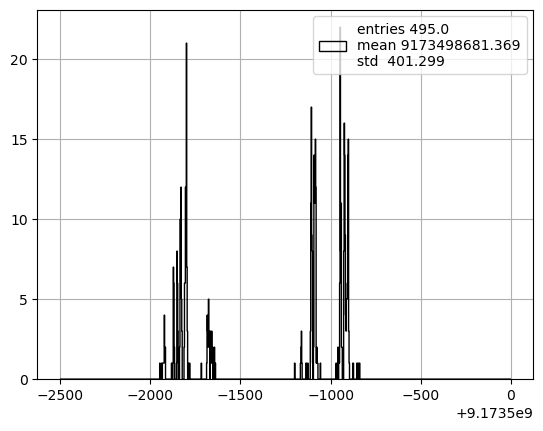

In [ ]:
pltext.hist(hit_times[5497][np.concatenate(cosmic_triggered_hits_index.get(5497))], 1000,  range=(497500+9.173e9, 500000+9.173e9));

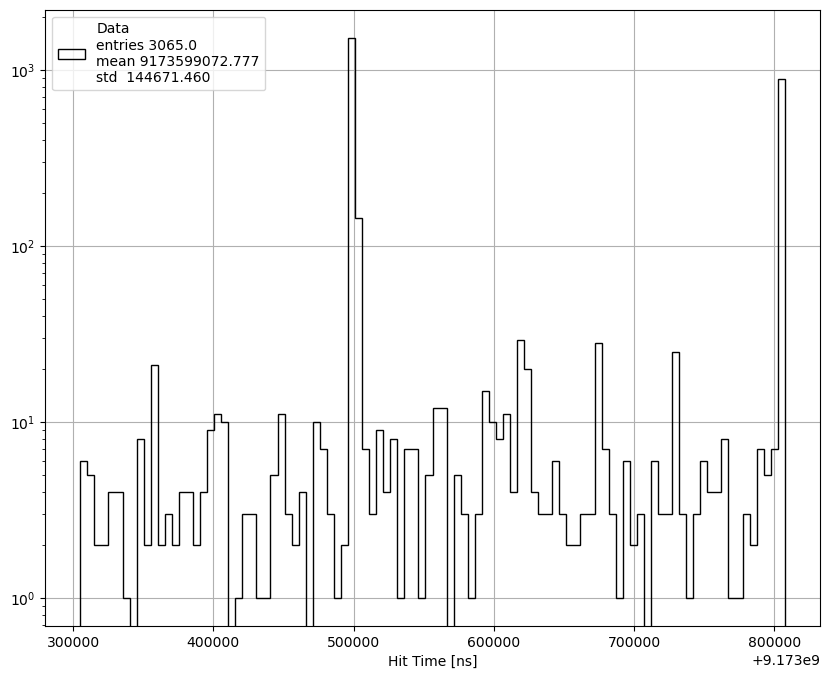

In [ ]:
fig = plt.figure(figsize=(10,8))

pltext.hist(hit_times[5497], 100, ylog=True, xylabels=("Hit Time [ns]"), label="Data");
# pltext.hist(hit_times[5497], 100, ylog=True, xylabels=("Hit Time [ns]"), label="Data");
# pltext.hist(hit_times[5497][np.concatenate(cosmic_triggered_hits_index.get(5497))], 100, ylog=True, range=(480000+9.173e9, 520000+9.173e9), label="Triggered Hits");
plt.legend(loc="upper left");

# NiCf Studies With Trigger Threshold Upper Bound

In [ ]:
thresholds   = [4,5,6,7,8,9,10,11,12]
exp_values_upper_bound = []
noTrigger_per_event_run = []

for thresh in thresholds:
    triggered_hits_index = nHits(hit_times, w=50, thresh_min=thresh, thresh_max=50, pre_window=50, post_window=50, jump=100, progress_bar=False)
    noTriggers_per_event = []
    for key in triggered_hits_index.keys():
        noTriggers_per_event.append(len(triggered_hits_index.get(key)))
    
    noTrigger_per_event_run.append(noTriggers_per_event)
    exp_values_upper_bound.append(ut.stats(noTriggers_per_event)[1:3])

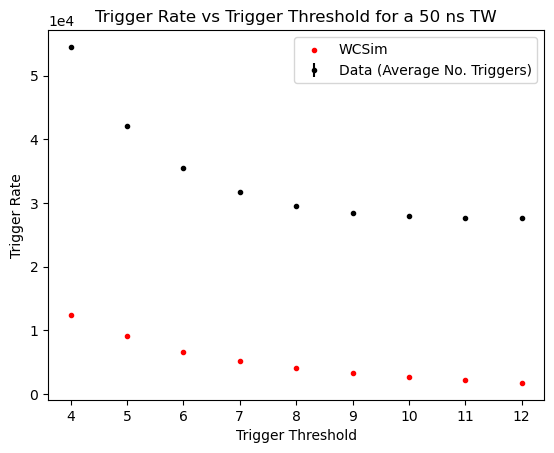

In [ ]:
means_upper_bound = [i[0]/500*1e6 for i in exp_values_upper_bound]
stds_upper_bound  = [np.sqrt(i[0]/500*1e6) / np.sqrt(len(j)) for (i,j) in zip(exp_values_upper_bound, noTrigger_per_event_run)]

plt.errorbar(thresholds, means_upper_bound, stds_upper_bound, fmt=".", label=f"Data (Average No. Triggers)");
plt.scatter(thresholds, np.array(theo_values)/500*1e6, marker=".", color="red", zorder=2, label="WCSim");
# plt.text(6.6, 5.4, "Trigger Window: 50 ns");

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.xlabel("Trigger Threshold");
plt.ylabel("Trigger Rate");
plt.title("Trigger Rate vs Trigger Threshold for a 50 ns TW");
plt.legend();

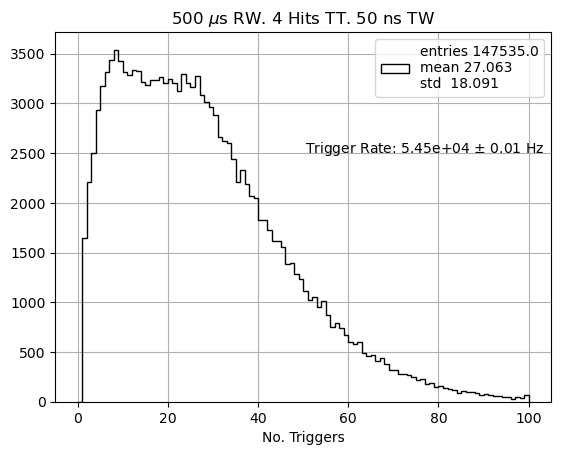

In [ ]:
data = noTrigger_per_event_run[0]
hist_values, bin_edges, _ = pltext.hist(data, 100, xylabels="No. Triggers", ylog=False, range=(0,100));
plt.title("500 $\mu$s RW. 4 Hits TT. 50 ns TW");

# Parámetros de la Poisson
lambda_value = ut.stats(data)[1]
t = np.arange(0, 20, 0.1)
poisson_curve = np.exp(-lambda_value) * np.power(lambda_value, t) / factorial(t)

# Ajustando la Poisson al histograma (escalando su altura)
poisson_curve_scaled = poisson_curve * (hist_values.max() / poisson_curve.max())

# Graficando la curva de Poisson sobre el histograma
# plt.plot(t, poisson_curve_scaled, 'b-', label='Poisson Fit');

plt.text(50.5, 2500, f"Trigger Rate: {ut.stats(data)[1]/500*1e6:.2e} $\pm$ {np.sqrt(ut.stats(data)[1])/np.sqrt(ut.stats(data)[0]):.2f} Hz")
plt.legend();

100000.0
92212.31819734722


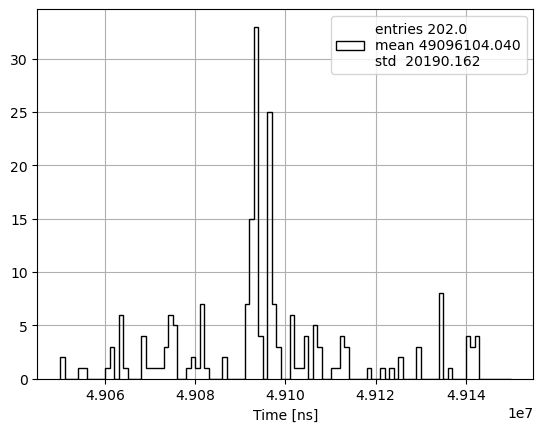

In [70]:
event = 22
hist_range = (4.905e7, 4.915e7)
data = hit_times[event]
c, b, _ = pltext.hist(data, 100, xylabels="Time [ns]", range=hist_range, ylog=False);

print(b[-1] - b[0])
indices_in_range = np.where((data >= hist_range[0]) & (data <= hist_range[1]))[0]
print(data[indices_in_range][-1] - data[indices_in_range][0])

pltext.style()

In [ ]:
triggered_hits_index = nHits(hit_times[:50], w=50, thresh_min=10, thresh_max=50, pre_window=50, post_window=50, jump=100, progress_bar=False)
noTriggers_per_event = {}
for key in triggered_hits_index.keys():
    noTriggers_per_event[key] = len(triggered_hits_index.get(key))

In [ ]:
print(noTriggers_per_event.keys())
print(noTriggers_per_event.values())

dict_keys([0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 39, 40, 42, 43, 44, 45, 46, 47, 48])
dict_values([10, 12, 1, 18, 2, 13, 1, 30, 2, 13, 24, 26, 1, 12, 19, 43, 30, 24, 14, 5, 13, 24, 13, 11, 16, 34, 1, 1, 2, 22, 3, 13, 13])


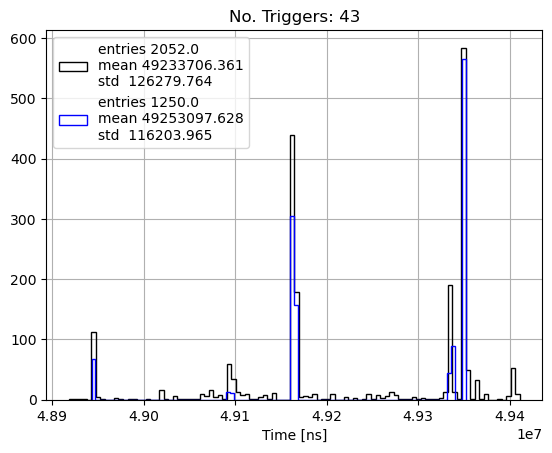

In [ ]:
event = 22
pltext.hist(hit_times[event], 100, xylabels="Time [ns]", ylog=False);
pltext.hist(hit_times[event][np.concatenate(triggered_hits_index.get(event))], 100);
plt.title(f"No. Triggers: {len(triggered_hits_index.get(event))}");

# Event Display

(2014,)


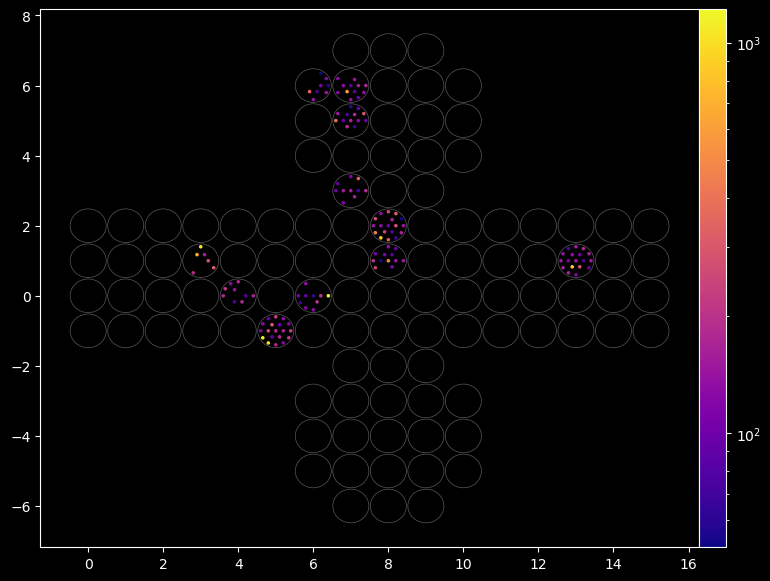

In [71]:
event = 22
pmt_id = (run_slots[event]*19 + run_positions[event])
data_to_plot = run_charges[event][indices_in_range]

eventDisplay = EventDisplay() 
eventDisplay.load_mPMT_positions('mPMT_2D_projection_angles.csv')

ev_disp_data = eventDisplay.process_data(pmt_id, data_to_plot, sum_data=False)
eventDisplay.plotEventDisplay(ev_disp_data, color_norm=colors.LogNorm(), style="dark_background", fig_width=10)

plt.show(block=False)
plt.style.use('default');

# Plots For Mark Scott

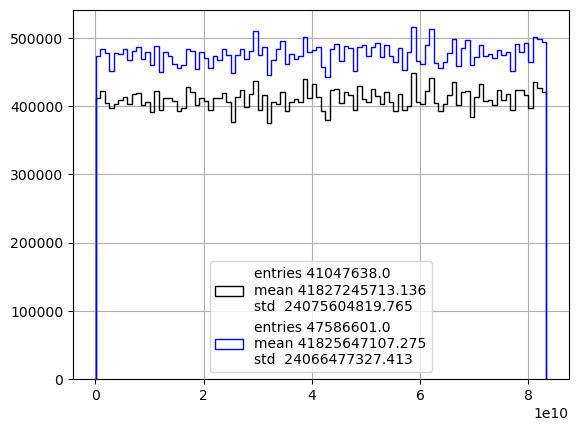

In [ ]:
pltext.hist(ak.ravel(hit_times[:50000]), 100);
pltext.hist(ak.ravel(run_times[:50000]), 100);

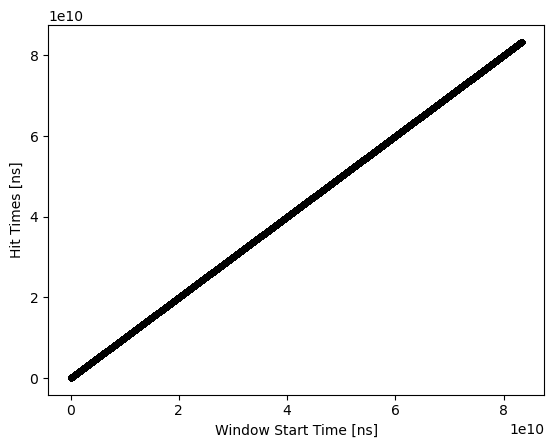

In [ ]:
"""
For the first plot, could you try stacking the hits from all 50,000 windows plotted versus the time relative to the start of the window?  
I wonder if some windows are being truncated, and the binning on the plot below is probably a little coarse to see this.
"""
plt.scatter(ak.ravel(run_window_times[:50000])[::50], ak.ravel(run_times[:50000])[::50], marker=".");
plt.xlabel("Window Start Time [ns]");
plt.ylabel("Hit Times [ns]");

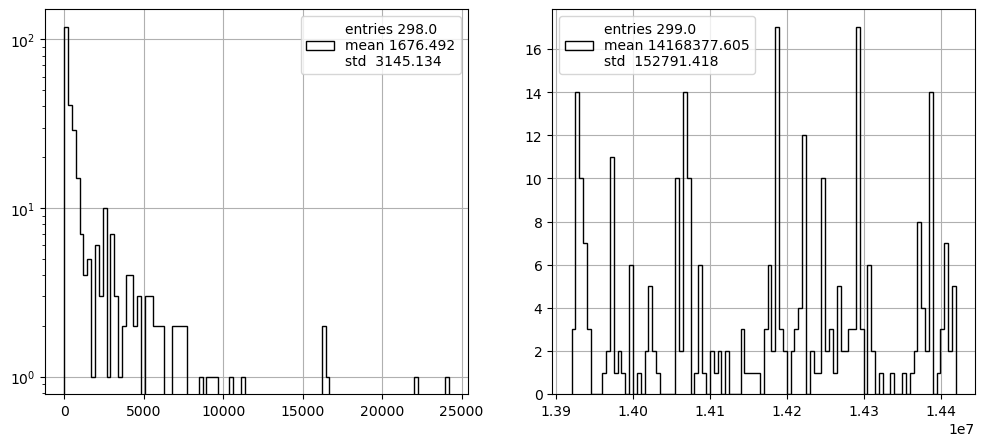

In [7]:
"""
Could you also plot the time between consecutive hits in nsec, as a histogram?  This should be an exponential distribution(e^-A, with A = some value) 
for dark noise hits with a relatively long tail out to high values (given the dark noise rate is 100s of kHz the mean of the dark noise exponential 
should be around 1000 or so ns), but the NiCf hits should all cluster with a time between hits of a few ns.  This is an alternate way to check the 
nHits trigger rate I think.
"""
subplot = pltext.canvas(2)

event = 1

subplot(1)
pltext.hist(np.diff(hit_times[event]), 100, ylog=True);

subplot(2)
pltext.hist(hit_times[event], 100, ylog=False);

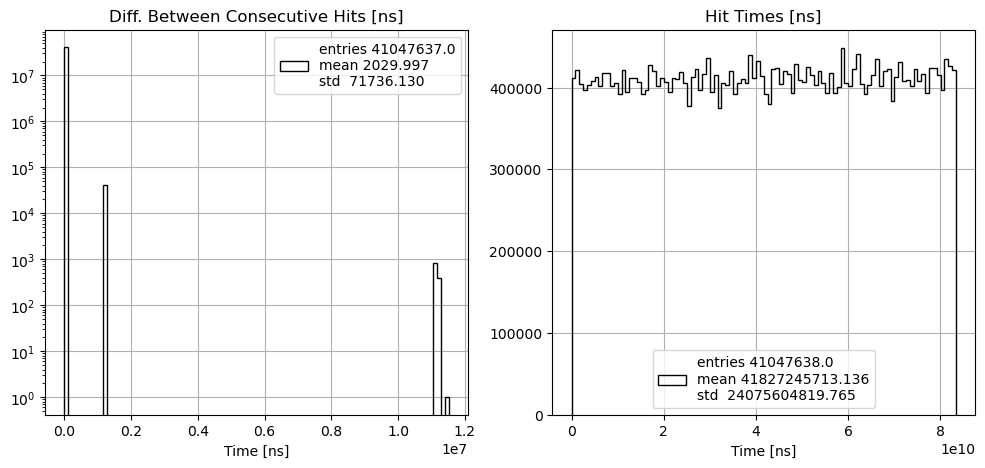

In [ ]:
subplot = pltext.canvas(2)

event = 1

subplot(1)
pltext.hist(np.diff(ak.ravel(hit_times[:50000])), 100, ylog=True, xylabels=("Time [ns]"));
plt.title("Diff. Between Consecutive Hits [ns]")

subplot(2)
pltext.hist(ak.ravel(hit_times[:50000]), 100, ylog=False, xylabels=("Time [ns]"));
plt.title("Hit Times [ns]");

In [12]:
"""
For your first figure I am not sure if the resolution in the X-axis is enough to see the window length, and if the windows became shorter for some reason, 
but the start time was still correct, then you wouldn’t be able to see that in your plot (I don’t think?).  What I meant in my email was to plot 
(hit time - window start time), so the relative time of the hits within the window, for all windows.  This should be uniform, and any structure 
would indicate something was going wrong somewhere.
"""
a = run_times - run_window_times


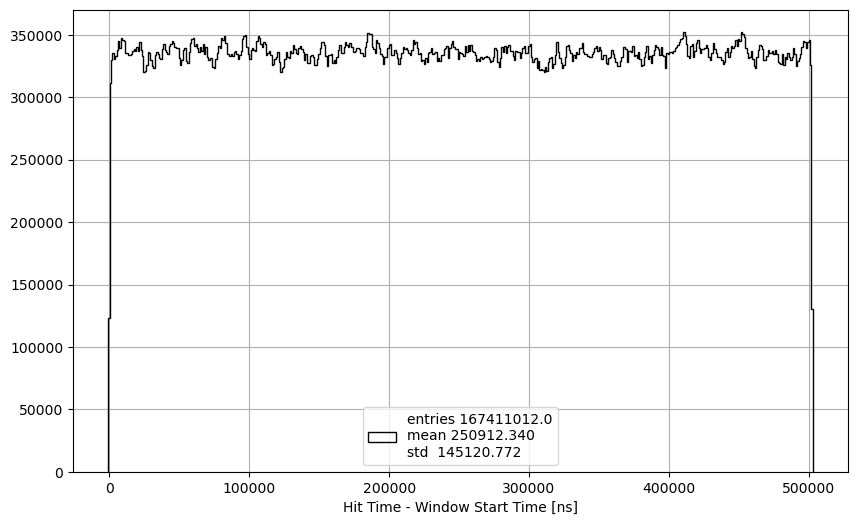

In [22]:
fig = plt.figure(figsize=(10, 6))
pltext.hist(ak.ravel(a), 500, xylabels="Hit Time - Window Start Time [ns]");